In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import gensim.models.keyedvectors as word2vec
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
from scipy import signal

## prerequisites
### loading word2vec model

In [2]:
model = word2vec.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

### loading nsynth mp3 embedding

In [3]:
z = np.load('sample_z.npy')

### loading customized module

In [5]:
import tagger
import importlib
importlib.reload(tagger)

<module 'tagger' from '/Users/tianjunma/Documents/academic/19s/10-335/artml-s19/project_3/tagger.py'>

### creating embeddings with reduced dimensionality

#### lyrics and manual tagging

In [15]:
# please define your own lyrics!
lyrics = ['We', 'don\'t', 'need', 'no', 'education']

# please define your own tagging!
# tagging of each word in seconds
# '' refers to background music without lyrics playing
durations = [('', 2.8),
             ('We', 0.4),
             ('don\'t', 0.4),
             ('need', 0.6),
             ('no', 1),
             ('education', 2),
             ('', 4.3)]

# calculate number of frames in the animation
fps = 100  # how smooth the video is
nframes = int(tagger.get_frames(durations, fps))

#### set up PCA

In [10]:
pca = PCA(n_components=2)

#### use PCA for dimensionality reduction
word embedding

In [16]:
word_embeddings_orig = pca.fit_transform(model[lyrics])
word_embeddings = {}

for i, word in enumerate(lyrics):
    if word != '':
        word_embeddings[word] = word_embeddings_orig[i]

audio embedding

In [17]:
wav_embeddings_orig = pca.fit_transform(z[0]) / np.max(z[0])
wav_embeddings = signal.resample(wav_embeddings_orig, nframes) * 2e-1

## creating animation

In [21]:
limit = 5  # how wide does the function span
resolution = 10  # how smooth the function surface is

# setting up space to hold the animated surface
x = np.linspace(-limit, limit, resolution)
X, Y = np.meshgrid(x, x)

# update rule for animation
def update_plot(i, Z, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(X, Y, Zs[:,:,i], cmap="magma")
    ax.axis('off')

### create frames in the animation

In [20]:
Zs = tagger.get_Zs(word_embeddings, durations, wav_embeddings, resolution, nframes, limit, fps)

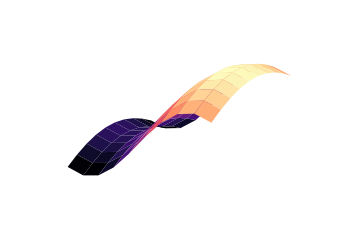

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot = [ax.plot_surface(X, Y, Zs[:,:,0], color='0.75', rstride=1, cstride=1)]
ani = animation.FuncAnimation(fig, update_plot, frames=nframes, fargs=(Zs, plot), interval=1000/fps)

### visualize the animation

In [24]:
plt.rcParams['animation.html'] = 'html5'
ani

### save the animation to mp4 file

In [ ]:
ani.save('video.mp4',writer='ffmpeg',fps=fps)